In [73]:
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [58]:
data = pd.read_csv("../workshop/winequality-red.csv", delimiter=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

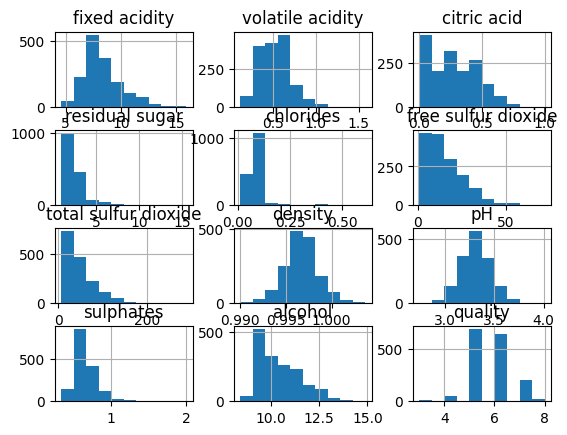

In [59]:
data.hist()

In [60]:
trainval, test = train_test_split(data, test_size=0.3)
train, validation = train_test_split(trainval, test_size=0.285)




array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

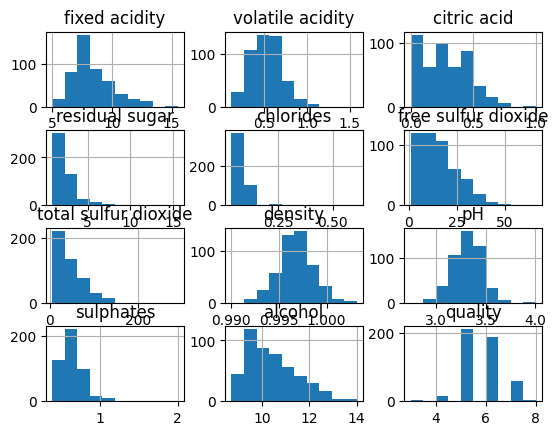

In [61]:
test.hist()

In [62]:
data['quality'].value_counts()/len(data)

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: count, dtype: float64

In [63]:
test['quality'].value_counts()/len(test)

quality
5    0.437500
6    0.393750
7    0.122917
4    0.029167
8    0.010417
3    0.006250
Name: count, dtype: float64

In [64]:
validation['quality'].value_counts()/len(validation)

quality
5    0.423197
6    0.373041
7    0.134796
4    0.053292
8    0.009404
3    0.006270
Name: count, dtype: float64

In [65]:
train_features = train.drop('quality', axis=1)
validation_features = validation.drop('quality', axis=1)
test_features = test.drop('quality', axis=1)
train_targets = train['quality']
validation_targets = validation['quality']
test_targets = test['quality']


In [66]:
def eval_model(model, final_eval=False):
    train_predictions = model.predict(train_features)
    validation_predicitions = model.predict(validation_features)
    print("Train MAE:", mean_absolute_error(train_targets, train_predictions))
    print("Train MSE:", mean_squared_error(train_targets, train_predictions))
    print("Train R2:", r2_score(train_targets, train_predictions))

    print("Validataion MAE:", mean_absolute_error(validation_targets, validation_predicitions))
    print("Validataion MSE:", mean_squared_error(validation_targets, validation_predicitions))
    print("Validataion R2:", r2_score(validation_targets, validation_predicitions))
    if final_eval:
        test_predictions = model.predict(test_features)
        print("Test MAE:", mean_absolute_error(test_targets, test_predictions))
        print("Test MSE:", mean_squared_error(test_targets, test_predictions))
        print("Test R2:", r2_score(test_targets, test_predictions))


In [67]:
dt1 = DecisionTreeRegressor()
dt1.fit(train_features, train_targets)
eval_model(dt1)

Train MAE: 0.0
Train MSE: 0.0
Train R2: 1.0
Validataion MAE: 0.5454545454545454
Validataion MSE: 0.7210031347962382
Validataion R2: -0.01665558142112844


In [68]:
dt2 = DecisionTreeRegressor(max_depth=5)
dt2.fit(train_features, train_targets)
eval_model(dt2)

Train MAE: 0.4145497085359612
Train MSE: 0.3134179598834489
Train R2: 0.5077800765481422
Validataion MAE: 0.5627172986179754
Validataion MSE: 0.5491772058286469
Validataion R2: 0.22562878779612927


In [69]:
lr1 = LinearRegression()
lr1.fit(train_features, train_targets)
eval_model(lr1)

Train MAE: 0.490142452062868
Train MSE: 0.40146384369036026
Train R2: 0.3695048538908151
Validataion MAE: 0.5515416622620406
Validataion MSE: 0.5063947725114611
Validataion R2: 0.2859544611803182


In [ ]:
#lr2 = LinearRegression(tol=1e-3)
#lr2.fit(train_features, train_targets)
#eval_model(lr2)

Train MAE: 0.490142452062868
Train MSE: 0.40146384369036026
Train R2: 0.3695048538908151
Validataion MAE: 0.5515416622620406
Validataion MSE: 0.5063947725114611
Validataion R2: 0.2859544611803182


In [ ]:
#predictions = lr1.predict(test_features)
#plt.scatter(test_targets, predictions)

AttributeError: module 'matplotlib' has no attribute 'scatter'

In [ ]:
predictions = dt1.predict(test_features)
plt.scatter(test_targets, predictions)